In [1]:
import os
import requests as req

image_url = "https://raw.githubusercontent.com/quanhua92/human-pose-estimation-opencv/master/image.jpg"
model_url = 'https://raw.githubusercontent.com/quanhua92/human-pose-estimation-opencv/master/graph_opt.pb'


if not os.path.exists('image.jpg'):
    img = req.get(image_url).content
    with open('image.jpg','wb') as fd:
        fd.write(img)

if not os.path.exists('graph_opt.pb'):
    model = req.get(model_url).content
    with open('graph_opt.pb', 'wb') as fd:
        fd.write(model)

In [2]:
import cv2
#modeli ice aktar
model = cv2.dnn.readNetFromTensorflow('graph_opt.pb')

In [3]:
img_arr = cv2.imread('image.jpg')
frame = img_arr.copy()
img_arr.shape

(800, 800, 3)

In [4]:
img_arr[:1,:1]

array([[[226, 226, 226]]], dtype=uint8)

In [5]:
#blob = cv2.dnn.blobFromImage(img_arr, 1.0, img_arr.shape[:2], swapRB=True, crop=False)
blob = cv2.dnn.blobFromImage(img_arr, 1.0, img_arr.shape[:2], (127.5, 127.5, 127.5), swapRB=True, crop=False)
blob.shape

(1, 3, 800, 800)

In [6]:
blob[:1,:1]

array([[[[98.5, 98.5, 98.5, ..., 98.5, 98.5, 98.5],
         [98.5, 98.5, 98.5, ..., 98.5, 98.5, 98.5],
         [98.5, 98.5, 98.5, ..., 98.5, 98.5, 98.5],
         ...,
         [97.5, 97.5, 97.5, ..., 94.5, 94.5, 94.5],
         [97.5, 97.5, 97.5, ..., 93.5, 93.5, 93.5],
         [97.5, 97.5, 97.5, ..., 93.5, 93.5, 93.5]]]], dtype=float32)

---  
`cv.dnn.blobFromImage` fonksiyonu, bir görüntüyü derin öğrenme modeline uygun bir biçime dönüştürmek için kullanılır. Bu fonksiyon, görüntüyü normalize eder, boyutlandırır ve gerekli dönüşümleri yapar. Aşağıda bu fonksiyonun parametreleri ve işlevi detaylı olarak açıklanmıştır:

```python
cv.dnn.blobFromImage(frame, 1.0, (inWidth, inHeight), (127.5, 127.5, 127.5), swapRB=True, crop=False)
```

1. **`frame`**: 
   - Girdi görüntüsü. Bu, üzerinde işlem yapılacak görüntüdür.

2. **`scalefactor` (1.0)**:
   - Görüntü değerlerini çarpan faktör. Burada 1.0 kullanıldığı için görüntü değerleri değiştirilmeden işleme alınır.

3. **`size` (`(inWidth, inHeight)`)**:
   - Görüntünün yeniden boyutlandırılacağı boyutlar. Bu örnekte, `inWidth` ve `inHeight` argümanları kullanılarak belirtilmiştir. Derin öğrenme modelinin beklediği giriş boyutlarına uygun olarak yeniden boyutlandırma işlemi yapılır.

4. **`mean` (`(127.5, 127.5, 127.5)`)**:
   - Ortalama çıkarma değeri. Her bir kanal (BGR) için ayrı ayrı belirtilir. Görüntünün her kanalından bu değerler çıkarılır. Bu, görüntüyü normalize etmek için kullanılır. Genellikle, ortalama RGB değerlerini çıkararak görüntü merkezlenir. Bu örnekte, her kanal için 127.5 çıkarılır.

5. **`swapRB` (`True`)**:
   - R ve B kanallarının yer değiştirilip değiştirilmeyeceğini belirler. OpenCV, görüntüleri BGR formatında işlerken, birçok derin öğrenme modeli RGB formatında giriş bekler. `swapRB=True` parametresi, bu kanalların yer değiştirmesini sağlar.

6. **`crop` (`False`)**:
   - Görüntünün boyutlandırılması sırasında kırpma işlemi yapılıp yapılmayacağını belirtir. `False` olarak ayarlandığında, görüntü kırpılmaz, gerektiğinde yeniden boyutlandırma sırasında boşluk eklenir.

**Fonksiyonun İşlevi:**
`cv.dnn.blobFromImage` fonksiyonu, verilen görüntüyü derin öğrenme modelinin girişine uygun hale getirir. Bu, şu adımlarla gerçekleştirilir:
- Görüntü boyutlandırılır (`size`).
- Görüntü normalize edilir (ortalama değerler çıkarılır ve `scalefactor` ile çarpılır).
- Gerekirse R ve B kanalları yer değiştirir (`swapRB`).
- Gerekirse görüntü kırpılır (`crop`).

Bu işlem sonunda, derin öğrenme modeline uygun bir "blob" oluşturulur ve modelin `setInput` fonksiyonuna verilerek modelin beslenmesi sağlanır. Bu "blob", modelin kabul edeceği uygun boyut, kanal düzeni ve değer aralığına sahip olur.


In [7]:
model.setInput(blob)
detect = model.forward()
detect.shape

(1, 57, 100, 100)

In [8]:
#detect = detect[:, :19, :, :] 

In [9]:
BODY_PARTS = { "Nose": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
               "LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
               "RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "REye": 14,
               "LEye": 15, "REar": 16, "LEar": 17, "Background": 18 }

POSE_PAIRS = [ ["Neck", "RShoulder"], ["Neck", "LShoulder"], ["RShoulder", "RElbow"],
               ["RElbow", "RWrist"], ["LShoulder", "LElbow"], ["LElbow", "LWrist"],
               ["Neck", "RHip"], ["RHip", "RKnee"], ["RKnee", "RAnkle"], ["Neck", "LHip"],
               ["LHip", "LKnee"], ["LKnee", "LAnkle"], ["Neck", "Nose"], ["Nose", "REye"],
               ["REye", "REar"], ["Nose", "LEye"], ["LEye", "LEar"] ]




1. **["Neck", "RShoulder"]**:
   - Boyun ile sağ omuz arasındaki bağlantı.

2. **["Neck", "LShoulder"]**:
   - Boyun ile sol omuz arasındaki bağlantı.

3. **["RShoulder", "RElbow"]**:
   - Sağ omuz ile sağ dirsek arasındaki bağlantı.

4. **["RElbow", "RWrist"]**:
   - Sağ dirsek ile sağ bilek arasındaki bağlantı.

5. **["LShoulder", "LElbow"]**:
   - Sol omuz ile sol dirsek arasındaki bağlantı.

6. **["LElbow", "LWrist"]**:
   - Sol dirsek ile sol bilek arasındaki bağlantı.

7. **["Neck", "RHip"]**:
   - Boyun ile sağ kalça arasındaki bağlantı.

8. **["RHip", "RKnee"]**:
   - Sağ kalça ile sağ diz arasındaki bağlantı.

9. **["RKnee", "RAnkle"]**:
   - Sağ diz ile sağ ayak bileği arasındaki bağlantı.

10. **["Neck", "LHip"]**:
    - Boyun ile sol kalça arasındaki bağlantı.

11. **["LHip", "LKnee"]**:
    - Sol kalça ile sol diz arasındaki bağlantı.

12. **["LKnee", "LAnkle"]**:
    - Sol diz ile sol ayak bileği arasındaki bağlantı.

13. **["Neck", "Nose"]**:
    - Boyun ile burun arasındaki bağlantı.

14. **["Nose", "REye"]**:
    - Burun ile sağ göz arasındaki bağlantı.

15. **["REye", "REar"]**:
    - Sağ göz ile sağ kulak arasındaki bağlantı.

16. **["Nose", "LEye"]**:
    - Burun ile sol göz arasındaki bağlantı.

17. **["LEye", "LEar"]**:
    - Sol göz ile sol kulak arasındaki bağlantı.

Bu poz çiftleri, insan vücudundaki anahtar noktaların (örneğin, omuzlar, dirsekler, bilekler, kalçalar, dizler, ayak bilekleri, boyun, burun, gözler ve kulaklar) birbirleriyle olan bağlantılarını tanımlar. Bu bağlantılar, bir kişinin duruşunu veya pozunu oluşturmak için çizilir. Algoritma, her bir bağlantıyı belirli bir doğrulukla tespit eder ve bu bağlantıları çizerek kişinin duruşunu görselleştirir.

In [10]:
detect[0,0] # Nose lokasyonlari

array([[-6.6978219e-03, -3.5835898e-03,  1.7187027e-03, ...,
         3.8149930e-03,  2.0906492e-04, -1.3195626e-03],
       [ 1.9955961e-04,  3.4771231e-04,  3.3327541e-04, ...,
         7.4049872e-03,  1.4289217e-03, -2.4977028e-03],
       [ 3.1304755e-04,  2.3001083e-04,  1.2075524e-03, ...,
        -8.8979432e-04,  4.5324769e-03,  4.4885790e-05],
       ...,
       [ 3.9540138e-04,  3.2237335e-04,  2.8824480e-04, ...,
        -4.2065047e-05,  1.0238325e-03,  5.4277363e-04],
       [ 4.1246787e-04,  4.0850346e-04,  3.9969990e-04, ...,
        -3.8444253e-03, -6.1432272e-03, -5.9363106e-03],
       [ 4.4180453e-04,  4.1825115e-04, -1.3864948e-04, ...,
        -4.1887518e-03, -1.3401511e-03, -3.1202950e-03]], dtype=float32)

`cv.minMaxLoc` fonksiyonu, bir dizi veya görüntü içindeki minimum ve maksimum değerleri ve bunların konumlarını bulmak için kullanılır. Bu fonksiyon, hem minimum hem de maksimum değerleri ve bu değerlere karşılık gelen koordinatları döndürür. İşte `cv.minMaxLoc` fonksiyonunun ne işe yaradığı ve nasıl çalıştığına dair detaylı açıklama:

### `cv.minMaxLoc` Fonksiyonunun Kullanımı

```python
minVal, maxVal, minLoc, maxLoc = cv.minMaxLoc(src)
```

### Parametreler:
- **`src`**: Girdi dizisi veya görüntü. Tek kanallı (grayscale) bir görüntü olmalıdır.

### Döndürülen Değerler:
- **`minVal`**: Girdi verisindeki minimum değer.
- **`maxVal`**: Girdi verisindeki maksimum değer.
- **`minLoc`**: Minimum değerin bulunduğu koordinatlar (x, y).
- **`maxLoc`**: Maksimum değerin bulunduğu koordinatlar (x, y).

### `cv.minMaxLoc` Fonksiyonunun İşlevi:
1. **Minimum ve Maksimum Değerlerin Bulunması**:
   - Girdi verisindeki en küçük ve en büyük değerler bulunur.

2. **Koordinatların Belirlenmesi**:
   - Bu minimum ve maksimum değerlere karşılık gelen (x, y) koordinatları bulunur.

### Örnek Kullanım:
Aşağıda, `cv.minMaxLoc` fonksiyonunun bir ısı haritasında (heatmap) kullanılması örneklenmiştir:

```python
heatMap = out[0, i, :, :]  # i. vücut parçasının ısı haritası

# Isı haritasındaki en yüksek (maksimum) değeri ve konumunu bul
_, conf, _, point = cv.minMaxLoc(heatMap)
x = (frameWidth * point[0]) / out.shape[3]
y = (frameHeight * point[1]) / out.shape[2]
```

### Bu Kod Parçasının Açıklaması:
- **`heatMap`**: `out` değişkeninden belirli bir vücut parçasına ait ısı haritasını alır.
- **`cv.minMaxLoc(heatMap)`**: Bu ısı haritasındaki maksimum değeri (`conf`) ve bu değerin konumunu (`point`) bulur.
- **`x` ve `y` Koordinatları**: Maksimum değerin bulunduğu noktanın görüntüdeki gerçek koordinatları hesaplanır.

Bu fonksiyon, genellikle derin öğrenme ve görüntü işleme uygulamalarında, belirli bir özelliğin veya nesnenin en olası konumunu tespit etmek için kullanılır. Örneğin, vücut poz tahmininde, ısı haritasındaki en yüksek değer, belirli bir vücut parçasının en olası konumunu temsil eder. `cv.minMaxLoc` kullanılarak bu nokta bulunur ve daha sonra bu noktalar kullanılarak vücut parçaları arasındaki bağlantılar çizilir.

In [11]:


for i in range(len(BODY_PARTS)):
    heatmap = detect[0,i,:,:]
    _, conf, _ , maxloc = cv2.minMaxLoc(heatmap)
    print(maxloc)
    #break

(50, 9)
(51, 21)
(40, 20)
(32, 31)
(31, 42)
(61, 21)
(69, 32)
(68, 43)
(44, 52)
(45, 69)
(57, 93)
(58, 51)
(57, 71)
(57, 92)
(49, 7)
(52, 7)
(46, 9)
(55, 9)
(98, 1)


In [12]:
points = []
for i in range(len(BODY_PARTS)):
    heatmap = detect[0,i,:,:]
    _, conf, _ , maxloc = cv2.minMaxLoc(heatmap)
    #kordinatlar normalize edilen degerleri eski haline donderir boylece asil goruntu uzerindeki kordinatlar elde edilir.
    x = (img_arr.shape[0] * maxloc[0]) / detect.shape[3]
    y = (img_arr.shape[1] * maxloc[1]) / detect.shape[2]
    if conf > 0.25:
        points.append((int(x),int(y)))
    else:
        points.append(None)

In [13]:
points

[(400, 72),
 (408, 168),
 (320, 160),
 (256, 248),
 (248, 336),
 (488, 168),
 (552, 256),
 (544, 344),
 None,
 (360, 552),
 (456, 744),
 (464, 408),
 (456, 568),
 (456, 736),
 (392, 56),
 (416, 56),
 (368, 72),
 (440, 72),
 (784, 8)]

In [14]:
len(points)

19

In [15]:

for pair in POSE_PAIRS:
        partFrom = pair[0]
        partTo = pair[1]
        assert(partFrom in BODY_PARTS)
        assert(partTo in BODY_PARTS)

        idFrom = BODY_PARTS[partFrom]
        idTo = BODY_PARTS[partTo]
        
        if points[idFrom] and points[idTo]:
            cv2.line(img_arr, points[idFrom], points[idTo], (0, 255, 0), 3)
            cv2.ellipse(img_arr, points[idFrom], (3, 3), 0, 0, 360, (0, 0, 255), cv2.FILLED)
            cv2.ellipse(img_arr, points[idTo], (3, 3), 0, 0, 360, (0, 0, 255), cv2.FILLED)


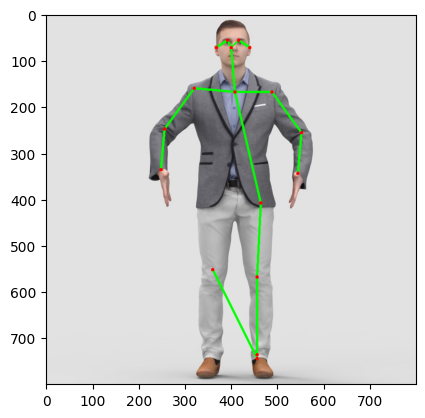

In [16]:
import matplotlib.pyplot as plt

image_rgb = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.show()